# use CNN for MNIST-dataset

**imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**load data**

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

**watch data**

In [5]:
single_img = X_train[0]
single_img.shape

(28, 28)

In [6]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

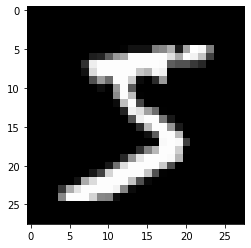

In [9]:
plt.imshow(single_img, cmap='gray')#cmap='plasma'

look the labels

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_train.shape

(60000,)

we don't want numbers, they should be categorical -> so one-hot-encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**transform y to categorical labels**

In [17]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

**normalize training data**

In [18]:
single_img.max()

255

In [19]:
# use minmaxscaler from sklearn
# but here we can also use operations
# because all images are the same 0-255

In [20]:
X_train = X_train / 255
X_train.max()

1.0

In [21]:
X_test = X_test / 255

In [22]:
scaled_image = X_train[0]

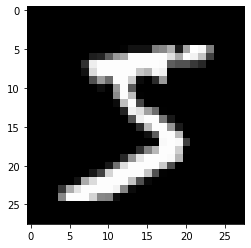

In [23]:
plt.imshow(scaled_image, cmap='gray')

**adding single dimension**<br>
to let the CNN know the amount of channels

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
# batch_size width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)

In [28]:
X_test.shape

(10000, 28, 28, 1)

In [27]:
X_test = X_test.reshape(10000, 28, 28, 1)

**create model**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
28/4

7.0

-> seems to fit

In [31]:
28*28

784

In [48]:
model = Sequential()

# filters are power of 2 and the complex the problem and the image is the more filters are using
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='valid', 
                                            input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# MULTICLASS -> SoftMax
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

[see more metrics available](https://keras.io/metrics/)

In [35]:
2 ** np.arange(1, 20)

array([     2,      4,      8,     16,     32,     64,    128,    256,
          512,   1024,   2048,   4096,   8192,  16384,  32768,  65536,
       131072, 262144, 524288], dtype=int32)

**train model**

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=1, verbose=1)
# early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=1, verbose=1)

In [50]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), epochs=10, callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1455 - accuracy: 0.9561 - val_loss: 0.0691 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 5: early stopping


**evaluate model**

<AxesSubplot:>

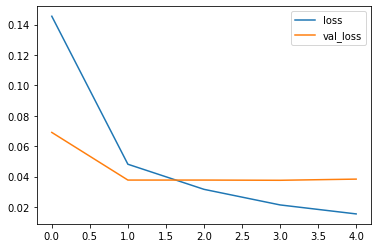

In [51]:
df_loss = pd.DataFrame(model.history.history)
df_loss.loc[:, ['loss', 'val_loss']].plot()

<AxesSubplot:>

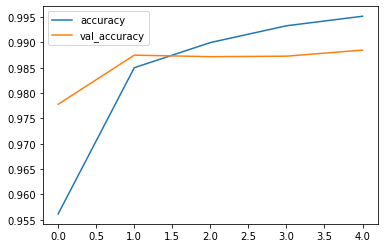

In [52]:
df_loss.loc[:, ['accuracy', 'val_accuracy']].plot()

In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.03837095946073532, 0.9884999990463257]

In [39]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [41]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[3.3274343e-08, 7.7441600e-09, 2.1095705e-08, ..., 9.9999034e-01,
        3.6285576e-06, 3.4289419e-06],
       [2.6088504e-10, 1.0357199e-06, 9.9999893e-01, ..., 2.1232848e-12,
        3.5313395e-12, 5.8785483e-11],
       [4.7512044e-06, 9.9987602e-01, 3.6022093e-06, ..., 1.2241363e-05,
        4.1110932e-05, 2.7440985e-08],
       ...,
       [5.0814418e-14, 8.4360366e-11, 1.6924375e-12, ..., 3.3027963e-09,
        1.0298497e-07, 9.3472991e-08],
       [4.5913659e-12, 6.6151796e-14, 1.8458103e-13, ..., 1.9521763e-13,
        1.4957150e-06, 2.7620168e-11],
       [6.1114214e-08, 4.3273791e-11, 1.1929041e-09, ..., 1.4276393e-14,
        2.5706277e-09, 2.3703668e-11]], dtype=float32)

In [61]:
predictions = predictions.argmax(axis=1)

In [62]:
confusion_matrix(predictions, y_test)

array([[ 971,    0,    2,    0,    0,    0,    6,    0,    2,    0],
       [   0, 1128,    1,    0,    0,    0,    2,    2,    1,    1],
       [   1,    1, 1021,    0,    1,    0,    0,    7,    1,    0],
       [   0,    1,    1,  999,    0,    6,    1,    4,    3,    7],
       [   0,    0,    1,    0,  974,    0,    2,    1,    0,   10],
       [   3,    2,    0,    9,    0,  885,    6,    2,    2,   14],
       [   3,    1,    1,    0,    2,    1,  939,    0,    0,    0],
       [   1,    1,    3,    0,    0,    0,    0, 1007,    0,    1],
       [   1,    1,    2,    1,    2,    0,    2,    3,  962,    7],
       [   0,    0,    0,    1,    3,    0,    0,    2,    3,  969]],
      dtype=int64)

In [64]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       981
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.98      1022
           4       0.99      0.99      0.99       988
           5       0.99      0.96      0.98       923
           6       0.98      0.99      0.99       947
           7       0.98      0.99      0.99      1013
           8       0.99      0.98      0.98       981
           9       0.96      0.99      0.98       978

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

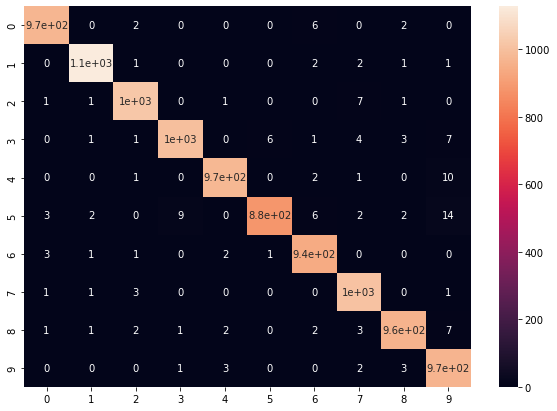

In [67]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)

**predict single image**

In [69]:
my_number = X_test[0]

In [72]:
my_number.max()

1.0

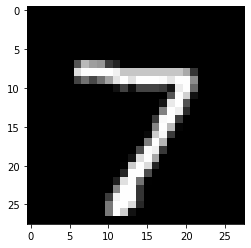

In [71]:
plt.imshow(my_number, cmap='gray')

In [76]:
# batch_size width, height, color_channels
pred = model.predict(my_number.reshape(1, 28, 28, 1))
pred.argmax(axis=1)

1/1 [==============================] - 0s 14ms/step


array([7], dtype=int64)